In [ ]:
# Computer vision is the art of teaching computer to see

torchvision:    Containes datasets, model architectures and image transformatioons often used for computer vision.
torchvision.datasets:   
torchvision.models:   Contains well-performing and commonly used computer vision  model architerctures
torchvision.transforms:   Often images need to be transformed
torch.utils.data.Dataset: Base dataset class for pytorch
torch.utils.data.DataLoader:  

In [3]:
# Importing pytorch
import torch
from torch import nn
# Importing torch vision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
# Importing matplotlib for visulization
import matplotlib.pyplot as plt
plt.rcParams.update({
    "figure.facecolor":"black",
    "axes.facecolor":"black",
    "axes.edgecolor":"orange",
    "xtick.color":"red",
    "ytick.color":"yellow",
    "legend.labelcolor":"linecolor"
})

print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.1.0+cu121
torchvision version: 0.16.0+cu121


1. Getting Dataset:

*   starting with FashionMNIST
*   MNIST stands for Modified National Institute of Standard and Technology
MNIST datasets contains handwritten digits



In [4]:
# Setting training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to
    train = True, # get training data
    download = True, # download data if it doesn't exist on disk
    transform=ToTensor(),
    target_transform=None # labels can also be transformed
)
# Setting testign data
test_data = datasets.FashionMNIST(
    root = "data",
    train=False, # get test data
    download =True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:03<00:00, 7826389.19it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 66835.34it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:09<00:00, 491341.14it/s] 


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 13419687.38it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [5]:
# Checking 1st sample of training data
image, label=train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
# Figuring out input and output shape of a computer vision model
# What's the shape of the image
image.shape

torch.Size([1, 28, 28])

here torch.size refers as
      [color_channels=1, height=28, width=28]
      color_channels=1 means the image is grayscale

In [7]:
# order of current tenosr is often referred to as CHW (Color Channels, Height, Width)
# NCHW and NHWC where N stands for number of images, suppose if batch size=32 then tensor shape may be [32, 1, 28, 28]
# NCHW is accepted 1st by pytorch 1st

In [8]:
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [9]:
# Chcking classes
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

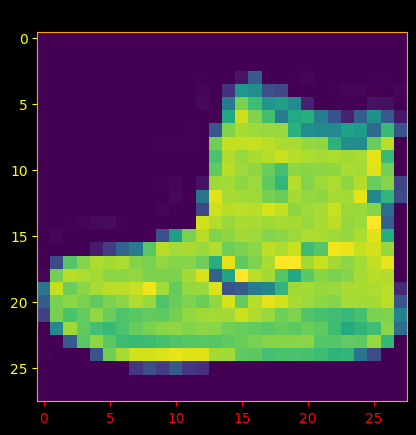

In [10]:
# Visualizing data
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # image shapee is [1, 28, 28] (colour channels, height, width)
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

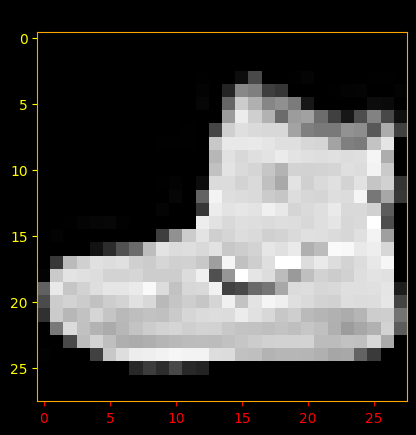

In [11]:
# using the cmap="grey" the image can be transformed into grey
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])

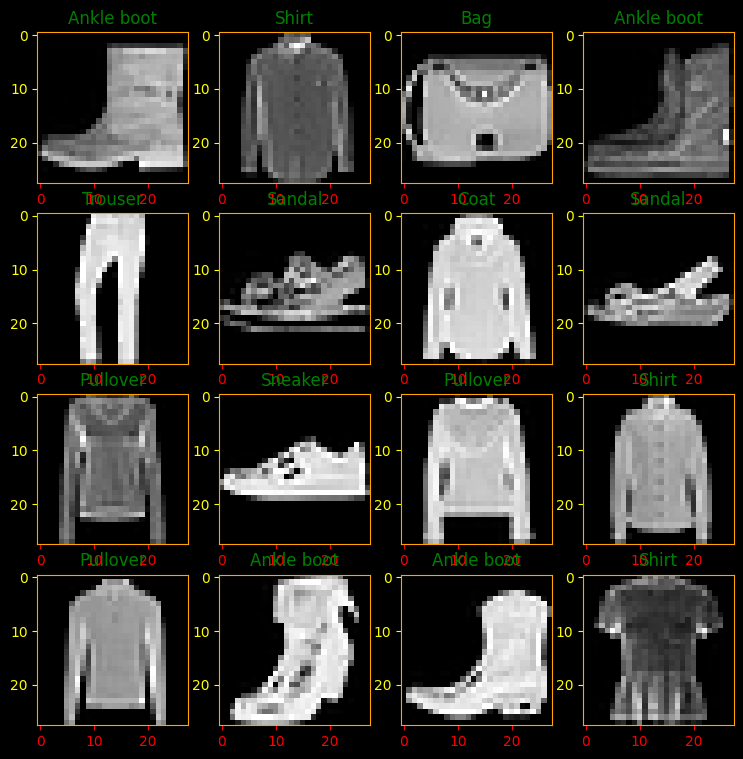

In [12]:
# Plotting more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows * cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label], c="green")
  # plt.axis(False)


In [13]:
# 2.Preparing Data Loader
# torch.utils.data.DataLoader or DataLoader turns a large dataset into a python iterable of smaller chunks
# smaller chunks are called batches or minibatchees and can be set by the batch_size parameter
from torch.utils.data import DataLoader
# Setup the batch size hyperparmeter
BATCH_SIZE = 32
# Turning datasets into iterable (batches)
train_dataloader = DataLoader(train_data, # datasets to turn into iterable
                              batch_size = BATCH_SIZE, shuffle=True # shuffle training data for every epoch
                      )
test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)
# Checkign what's created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches fo {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x780a8db6afe0>, <torch.utils.data.dataloader.DataLoader object at 0x780a8db6b7c0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches fo 32


In [14]:
# Checking out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


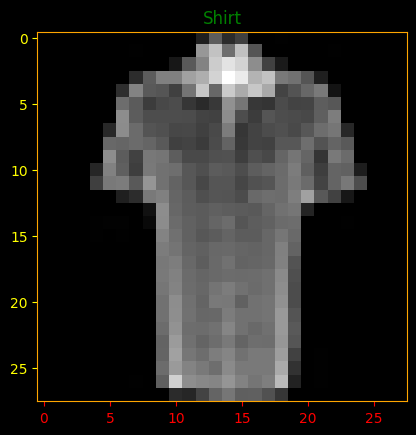

In [15]:
# Showing a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label], c="green")
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")


3. Model 0: Building a baseline model
Baseline model is the simples model that can be imagined, can be considered as a Starting point
Our baseline will consist of only 2 nn.Linear() layers
As we're dealing with image data, we'r going to use a different layer to start things off nn.Flatten() layer
nn.Flattern() compresses the dimensions of a tensor into a single vector

In [16]:
# Create a flatten layer
flatten_model = nn.Flatten() # all nn modules function as a model (can do a forward pass)
x = train_features_batch[0]
# Flatten the sample
output = flatten_model(x)
# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")
print("x is ", x)
print("output is  {}".format(output))

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]
x is  tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.

In [30]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __int__(self, input_shape:int, hidden_units: int, output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # neural networks like their input in vector forms
        nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = no. of features in,
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )
  def forward(self, x):
    return self.layer_stack(x)

In [33]:
torch.manual_seed(42)
#Need to setup model with input parameters
model_0 = FashionMNISTModelV0(784, 10, len(class_names))# one ouput ffor every class
model_0.to("cpu") # keeping model on cpu to begin with

TypeError: FashionMNISTModelV0.__init__() takes 1 positional argument but 4 were given